## Example one - MNIST classification
Tutorial [How to use Keras sparse_categorical_crossentropy](https://www.dlology.com/blog/how-to-use-keras-sparse_categorical_crossentropy/)

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
            optimizer=keras.optimizers.Adadelta(),
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

# model.compile(
#           optimizer=keras.optimizers.Adadelta(),
#           loss=keras.losses.categorical_crossentropy,
#           metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.2752 - sparse_categorical_accuracy: 0.9152 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9801
Epoch 2/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.0501 - val_sparse_categorical_accuracy: 0.9829
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0738 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0443 - val_sparse_categorical_accuracy: 0.9848
Epoch 4/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0606 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9885
Epoch 5/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0328 - val_sparse_categorical_accuracy: 0.9892
Epoch 6/12
60000/60000 

In [22]:
test_image = x_test[0]

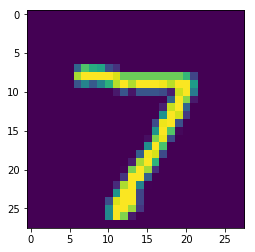

In [23]:
plt.imshow(test_image.reshape((28,28)))

In [31]:
predicted_logits = model.predict(test_image.reshape((1,28,28,1)))
predicted_logits

array([[2.8760809e-12, 1.6350768e-11, 5.7421073e-10, 3.3546241e-09,
        9.4157071e-13, 3.3218664e-12, 1.3249269e-14, 1.0000000e+00,
        4.0802882e-12, 1.0193049e-08]], dtype=float32)

In [32]:
predicted_logits.argmax()

7